In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
df = pd.read_csv('data/men_shoes.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_true.shape

(18280,)

In [0]:
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

In [0]:
#sredni blad daje 63, natomiast prawidlowa srednia to 93

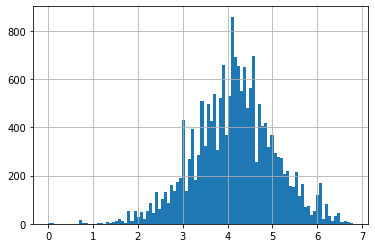

In [0]:
np.log1p(df['prices_amountmin'] ).hist(bins=100)

In [0]:
#teraz próba zrobienia z logarytmicznych wartości 
y_ture = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.brand.value_counts()
df['brand_cat'] = df['brand'].factorize()[0]
df['brand_cat'].value_counts()

20      1709
8        574
188      524
45       361
89       356
        ... 
1032       1
1699       1
1683       1
1064       1
1855       1
Name: brand_cat, Length: 1857, dtype: int64

In [0]:
df.manufacturer.value_counts()
df['manufacturer_er'] = df['manufacturer'].factorize()[0]
df['manufacturer_er'].value_counts()

-1      11984
 2        476
 14       374
 19       249
 50       170
        ...  
 6          1
 141        1
 227        1
 243        1
 583        1
Name: manufacturer_er, Length: 619, dtype: int64

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [144]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [142]:
run_model(['manufacturer_er'])

(-63.133649278023746, 3.394307434888982)

In [143]:
run_model(['brand_cat'
, 'manufacturer_er'])

(-58.53930419908596, 4.311223231615451)